In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import json
import copy
import numpy as np
from scipy.stats import levene
import json
import pathlib
current_file = '/Users/matin/Downloads/testProjs/MSC_M/scripts'
sys.path.insert(0,current_file)
dir_to_dirs = os.path.join(current_file,'..')
sys.path.insert(0,dir_to_dirs)
from dirs import dir_to_MSC_osteogenesis
sys.path.insert(0,dir_to_MSC_osteogenesis)
from parameters import free_params_all
from all_runs_posteriors_dispesity import determine_title
from posteriors_dispersity import relabel,relabel_description

plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

plt.rcParams["mathtext.default"]='rm'
plt.rcParams['mathtext.fontset'] = 'stixsans'
# del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()
%config IPCompleter.greedy=True

In [2]:
class settings:
	results_folder = os.path.join(dir_to_dirs,'results')
	file =  'PTTSs.json'

	axis_font = {'fontname':'Times New Roman', 'size':'20'}
	legend_font = { 'family':'Times New Roman','size':'13'}
	# colors = ['indigo' , 'darkred', 'olive','royalblue','red']
	fig_size = (10,9)
	barheight = .7
	linewidth = 1
	title_font = { 'family':'Times New Roman','size':'19'}
	colors = ['indigo' , 'darkred', 'olive','royalblue','red','blue']

In [3]:
def edit_params(free_params_all): # get rid of this parameters
    if 'a_Chen_2018_ALP' in free_params_all:
        del free_params_all['a_Chen_2018_ALP']
    if 'a_Chen_2018_ARS' in free_params_all:
        del free_params_all['a_Chen_2018_ARS']
    if 'a_Valles_2020_ALP' in free_params_all:
        del free_params_all['a_Valles_2020_ALP']
    if 'a_Valles_2020_ARS' in free_params_all:
        del free_params_all['a_Valles_2020_ARS']
    if 'a_Qiao_2021_ALP' in free_params_all:
        del free_params_all['a_Qiao_2021_ALP']
    if 'a_Ber_2016_OC' in free_params_all:
        del free_params_all['a_Ber_2016_OC']
    if 'a_Ber_2016_ALP' in free_params_all:
        del free_params_all['a_Ber_2016_ALP']
    return free_params_all
def add_missing_params(PTTSs_studies,free_params_all):
    PTTSs_studies_adj ={}
    for study,PTTS in PTTSs_studies.items():
        PTTSs_adj = {}
        for key in free_params_all.keys():
            if key in PTTS.keys():
                PTTSs_adj[key] = PTTS[key]
            else:
                PTTSs_adj[key] = 0
        PTTSs_studies_adj[study]=PTTSs_adj
    return PTTSs_studies_adj 


def adjust_PPTS(PPTSs_studies):
    PPTSs_studies_adj = {}
    for study,PPTSs in PPTSs_studies.items():
        #// make them over 1
        adj_PPTSs = {}
        for key,value in PPTSs.items():
            if key == 'ALP_0' or key == 'ALP_M_n':
                value/=2
            adj_PPTSs[key] = value+1
        #// make it logaritmic
        log_PTTSs = {}
        for key,value in adj_PPTSs.items():
            log_PTTSs[key] = np.log10(value)
        #// normalize
        norm_PPTSs = {}
        for key,value in log_PTTSs.items():
            norm_PPTSs[key] = value/max(log_PTTSs.values())

        final_data = norm_PPTSs
        PPTSs_studies_adj[study] = final_data

    return PPTSs_studies_adj

<Figure size 432x288 with 0 Axes>

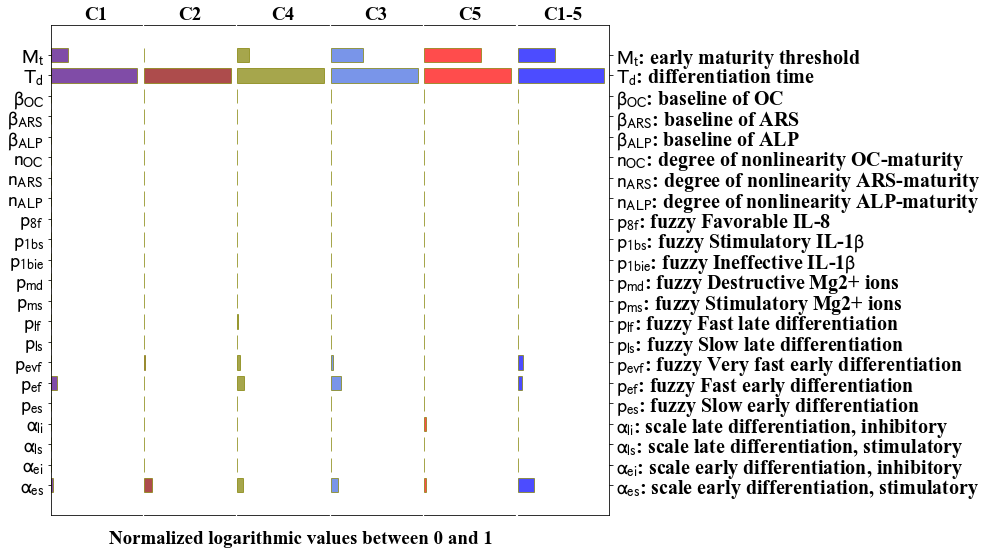

In [4]:
free_params_all = edit_params(free_params_all)

with open(os.path.join(settings.results_folder,settings.file)) as ff:
    PTTSs_studies= json.load(ff)
PTTSs_studies = add_missing_params(PTTSs_studies = PTTSs_studies,free_params_all=free_params_all )
PTTSs_studies = adjust_PPTS(PTTSs_studies)
# plot sensitity
fig = plt.figure()
f, axes = plt.subplots(1, 6,figsize=settings.fig_size, gridspec_kw={'width_ratios': [1,1,1,1,1,1],'wspace':0.025})
# plot sensitity
i = 0
for study,PTTSs in PTTSs_studies.items():
    PTTSs_values = list(PTTSs.values())
    adj_lables = relabel(list(PTTSs.keys()))

    axes[i].barh(adj_lables,PTTSs_values,alpha = 0.7,color=settings.colors[i],height=settings.barheight,edgecolor='olive',
                 linewidth=settings.linewidth)
    axes[i].set_xlim([0,1.05])
    axes[i].set_xticks([0,0.5,1])
    # axes[i].set_title(tag,y=1.01,**title_font)
    axes[i].set_xticks([], [])
    # axes[i].set_ylim([-.5,19.5])
    if i == 5:
        axes[i].set_yticks([1,2], ['2','3tfddd'])
        axes[i].yaxis.set_label_position("right")
        axes[i].yaxis.tick_right()

    else:
        right_edge = axes[i].spines["right"]
        right_edge.set_visible(False)

    if i == 0:
        pass
    else:
        left_edge = axes[i].spines["left"]
        left_edge.set_visible(False)
        axes[i].set_yticks([], [])
    axes[i].set_title(determine_title(study),fontdict =settings.title_font,fontweight='bold')
    i+=1

plt.yticks([(i) for i in range(len(free_params_all.keys()))], relabel_description(free_params_all.keys()),rotation=0,fontweight='normal')
# ax.set_xlim([-.25,2.25])
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(settings.axis_font['fontname'])
        label.set_fontsize(float(settings.axis_font['size']))
plt.text(-2.5,-3, "Normalized logarithmic values between 0 and 1",**settings.title_font,
    horizontalalignment='center',
    verticalalignment='bottom')
plt.savefig(os.path.join(settings.results_folder,"SA.svg"),bbox_inches="tight")
